In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


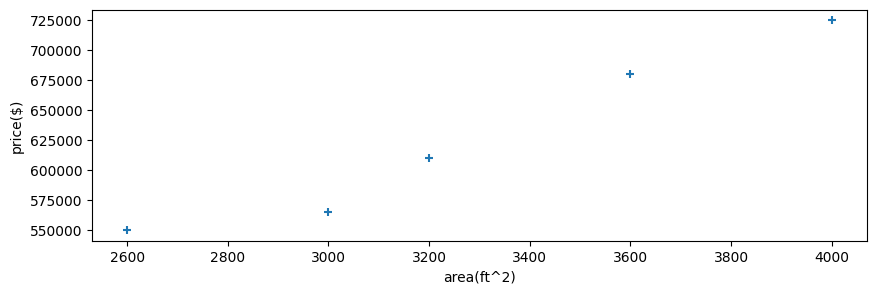

In [6]:
plt.figure(figsize = (10,3))
plt.xlabel('area(ft^2)')
plt.ylabel('price($)')
plt.scatter(df['area'], df['price'], marker = '+')
plt.show()


In [7]:

model = linear_model.LinearRegression()
model.fit(df[['area']], df[['price']])

LinearRegression()

In [8]:
model.predict([[3300]])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[628715.75342466]])

In [9]:

coef, bias = model.coef_, model.intercept_
coef, bias

(array([[135.78767123]]), array([180616.43835616]))

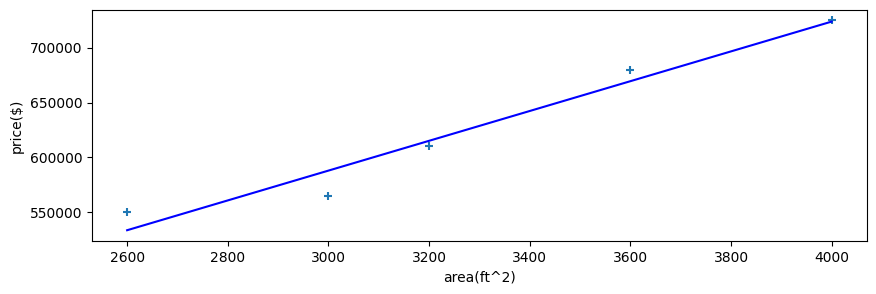

In [10]:

plt.figure(figsize = (10,3))
plt.xlabel('area(ft^2)')
plt.ylabel('price($)')
plt.scatter(df[['area']], df[['price']], marker = '+')
plt.plot(df[['area']], model.predict(df[['area']]), color = 'blue')
plt.show()

In [12]:
df_area = pd.read_csv('areas.csv')
df_area.sample(7)

,area
9,2300
8,4750
11,8600
6,5490
10,9000
3,3540
2,2300


In [13]:

p = model.predict(df_area)
p

array([[ 316404.10958904],
       [ 384297.94520548],
       [ 492928.08219178],
       [ 661304.79452055],
       [ 740061.64383562],
       [ 799808.21917808],
       [ 926090.75342466],
       [ 650441.78082192],
       [ 825607.87671233],
       [ 492928.08219178],
       [1402705.47945205],
       [1348390.4109589 ],
       [1144708.90410959]])

In [14]:

df_area['prices'] = p

In [15]:

df_area.sample(7)

,area,prices
5,4560,7.998082e+05
4,4120,7.400616e+05
12,7100,1.144709e+06
3,3540,6.613048e+05
1,1500,3.842979e+05
9,2300,4.929281e+05
0,1000,3.164041e+05


In [16]:
df_area.to_csv('predictions.csv', index = False)